In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
data = {}
f =  open("Who Says.txt", "r")
data[0] = f.read()
data[0]

" \nI wouldn't wanna be anybody else\nHey\n\n[Verse 1]\nYou made me insecure,\nTold me I wasn't good enough.\nBut who are you to judge\nWhen you're a diamond in the rough?\nI'm sure you got some things\nYou'd like to change about yourself.\nBut when it comes to me\nI wouldn't want to be anybody else.\n\nNa na na na na na na na na na na na na\nNa na na na na na na na na na na na na\n\nI'm no beauty queen\nI'm just beautiful me\n\nNa na na na na na na na na na na na na\nNa na na na na na na na na na na na na\n\nYou've got every right\nTo a beautiful life\nC'mon\n\n[Chorus:]\nWho says, who says you're not perfect?\nWho says you're not worth it?\nWho says you're the only one that's hurtin'?\nTrust me, that's the price of beauty\nWho says you're not pretty?\nWho says you're not beautiful?\nWho says?\n\n[Verse 2:]\nIt's such a funny thing\nHow nothing's funny when it's you\nYou tell 'em what you mean\nBut they keep whiting out the truth\nIt's like a work of art\nThat never gets to see the li

In [3]:
pd.set_option('max_colwidth', 200)
df1 = pd.DataFrame.from_dict(data, orient ='index')
df1.columns = ['Lyrics']
df1

,Lyrics
0,"\nI wouldn't wanna be anybody else\nHey\n\n[Verse 1]\nYou made me insecure,\nTold me I wasn't good enough.\nBut who are you to judge\nWhen you're a diamond in the rough?\nI'm sure you got some th..."


In [4]:
import re
import string

def round1(text):
    #lower the Text
    text = text.lower()
    # Remove Numbers 
    text = re.sub(r"\d+", "", text)
    # Remove Symbols and special characters
    # Below return true if not alphanumereic 
    text = re.sub(r'[^\w]', ' ', text)
    # Remove more than a single whitespace 
    text = ' '.join(text.split())
    # Remove Leading and Trailing Whitespaces
    text = text.strip()
    return text
rnd1 = lambda x: round1(x)

In [5]:
df2 = df1.copy()
df2['Lyrics'] = df2['Lyrics'].apply(rnd1)
df2

,Lyrics
0,i wouldn t wanna be anybody else hey verse you made me insecure told me i wasn t good enough but who are you to judge when you re a diamond in the rough i m sure you got some things you d like to ...


In [6]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

#stopwords = nltk.corpus.stopwords.words('english')
#t =['re','ve', 'em', 'll', 't', 's', 'don', 'ain', 'didn' ,'m' , 'wan', 'na' , 'la', 'gon', 'wan']

#stopwords.extend(t)
#stop = stopwords + list(string.punctuation)
stop = list(string.punctuation)

def cleaning(text):
    clean_doc=[]
    for x in text:
        clean_sent=[]
        for i in word_tokenize(x):
        #for i in x.lower(): 
            if i not in stop:
                clean_sent.append(i) 
        clean_doc.append(clean_sent)
    return clean_doc 

In [7]:
df3 = df2.copy()
df3['Lyrics'] = cleaning(df3['Lyrics'])
df3

,Lyrics
0,"[i, wouldn, t, wan, na, be, anybody, else, hey, verse, you, made, me, insecure, told, me, i, wasn, t, good, enough, but, who, are, you, to, judge, when, you, re, a, diamond, in, the, rough, i, m, ..."


In [8]:
s = ' '
for i in range(len(df3)):
    df3['Lyrics'].loc[i] = s.join(df3['Lyrics'].loc[i])
df3

,Lyrics
0,i wouldn t wan na be anybody else hey verse you made me insecure told me i wasn t good enough but who are you to judge when you re a diamond in the rough i m sure you got some things you d like to...


In [9]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def Lemmatizing(text):
    pre_doc= []
    for word in text:
        pre_doc.append(wordnet.lemmatize(word))
    return pre_doc

In [10]:
df4 = df3.copy()
df4['Lyrics'] = Lemmatizing(df4['Lyrics'])
df4

,Lyrics
0,i wouldn t wan na be anybody else hey verse you made me insecure told me i wasn t good enough but who are you to judge when you re a diamond in the rough i m sure you got some things you d like to...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
df5 = cv.fit_transform(df4['Lyrics'])
df6 = pd.DataFrame(df5.toarray(), columns = cv.get_feature_names())
df6.index = df4.index
df6

,anybody,art,beautiful,beauty,beneath,best,bridge,change,chorus,comes,...,verse,wan,want,wasn,whiting,won,work,worth,wouldn,yeah
0,2,1,10,7,1,1,1,1,3,1,...,2,1,1,1,1,2,1,4,2,7


In [12]:
df7= df6.transpose()
df7

,0
anybody,2
art,1
beautiful,10
beauty,7
beneath,1
...,...
won,2
work,1
worth,4
wouldn,2


In [13]:
top_dict= {}
for c in df7.columns:
    top = df7[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [14]:
for album, top_words in top_dict.items ():
    print(album)
    print(', '.join([word for word, count in top_words]))
    print('------------')

0
na, says, beautiful, beauty, yeah, said, trust, price, pretty, hurtin, perfect, worth, chorus, just, got, like, funny, mon, life, wouldn, hey, queen, right, listen, anybody, ve, won, tell, verse, rough
------------


In [15]:
df4['Lyrics'].loc[0]

'i wouldn t wan na be anybody else hey verse you made me insecure told me i wasn t good enough but who are you to judge when you re a diamond in the rough i m sure you got some things you d like to change about yourself but when it comes to me i wouldn t want to be anybody else na na na na na na na na na na na na na na na na na na na na na na na na na na i m no beauty queen i m just beautiful me na na na na na na na na na na na na na na na na na na na na na na na na na na you ve got every right to a beautiful life c mon chorus who says who says you re not perfect who says you re not worth it who says you re the only one that s hurtin trust me that s the price of beauty who says you re not pretty who says you re not beautiful who says verse it s such a funny thing how nothing s funny when it s you you tell em what you mean but they keep whiting out the truth it s like a work of art that never gets to see the light keep you beneath the stars won t let you touch the sky na na na na na na 

In [16]:
from googletrans import Translator

In [17]:
ts = Translator()
res = ts.translate(df4['Lyrics'].loc[0], dest='hi')
hitext=res.text
hitext

'मैं किसी और से नहीं बनूँगा, अरे कोई भी शख्स तुमने मुझे असुरक्षित बना दिया है मुझे बताया है कि मैं बहुत अच्छा नहीं था, लेकिन जब आप किसी को एक हीरे के रूप में पहचानते हैं, तो आपको यकीन है कि आपको कुछ चीजें मिलेंगी जो आप अपने बारे में बदलना चाहते हैं लेकिन जब यह मेरे लिए आता है कि मैं किसी और के साथ नहीं रहना चाहता हूं और न ही भोलेपन में किसी भी ब्यूटी क्वीन के लिए सिर्फ ब्यूटीफुल नहीं हूं ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना ना तुम में एक खूबसूरत जीवन सी मोन कोरस के हर अधिकार को मिला है जो कहता है कि तुम कौन सही नहीं कहते हैं कि तुम इसके लायक नहीं हो जो आप कहते हैं कि केवल एक ही दुख है कि मुझ पर भरोसा करो कि सौंदर्य की कीमत जो कहती है कि तुम सुंदर नहीं हो, जो कहता है कि तुम सुंदर नहीं हो, जो कहता है कि यह एक ऐसी मजेदार चीज है जो कुछ भी नहीं है जब आप इसे बताएं तो यह हास्यास्पद है। आप का मतलब है, लेकिन वे सच को बाहर निकालते रहते हैं, यह कला के एक काम की तरह है जो कभी नहीं देखने को मिलता है कि प्रकाश आपको सितारों के नीचे रखता है, जो आपको आकाश को छूने नहीं देता है,

In [18]:
import os
from gtts import gTTS

In [19]:
myobj = gTTS(text=hitext, lang= 'hi', slow=False)
myobj.save("Translated Text.mp3")

In [27]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


def wordcloud_gen(text):
    #msk = np.array(Image.open("maskman.png"))
    # Create the wordcloud object
    wordcloud = WordCloud(#stopwords = add_stop_words,
                          font_path='Ananda Namaste Regular.ttf',
                          #mask = msk,
                          width=480, height=480,
                          #width=980, height=980,
                          #max_words=150, 
                          background_color="teal", 
                          #white, grey, pink, skyblue
                          colormap="YlOrRd", 
                          #Dark2, ocean, Accent, BuPu, PuBuGn, summer, Spectral,seismic
                          min_font_size = 28,
                          #max_font_size=150, 
                          #collocations=False,
                          random_state=42).generate(text)
    
    #wordcloud.to_file(i +".png")
    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

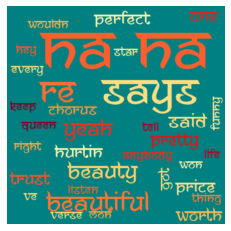

In [30]:
#for i in range (len(df4)):
wordcloud_gen(df4['Lyrics'].loc[0])